In [2]:
import pandas as pd

# Using a relative path to read the CSV file
csv_file_path = './pi0_boxcox_5.csv'

# Load the data into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print("The file was not found at the specified path.")

# Group by label and count the occurrences
count_by_label = df['label'].value_counts()

# Group by label and calculate mean for all other columns
mean_by_label = df.groupby('label').mean()

# Group by label and calculate standard deviation for all other columns
std_by_label = df.groupby('label').std()

# Display the results
print(f"Count by label:\n{count_by_label}\n")
print(f"Mean by label:\n{mean_by_label}\n")
print(f"Standard Deviation by label:\n{std_by_label}\n")


Count by label:
label
3    89
2    87
0    86
4     6
1     2
Name: count, dtype: int64

Mean by label:
       sdram_freq  cpu_cores     cpu_freq   avg_fps   total_time  mem_limit_kb
label                                                                         
0      326.162791        4.0   791.860465  1.195581    11.479070  6.187818e+05
1      325.000000        2.5   750.000000  0.575000  4786.555000  1.048576e+06
2      329.310345        2.0   793.103448  0.985287    14.191149  6.116693e+05
3      326.404494        1.0   802.247191  0.639213    22.028876  6.067603e+05
4      225.000000        3.0  1000.000000  0.845000    16.791667  4.369067e+05

Standard Deviation by label:
       sdram_freq  cpu_cores    cpu_freq   avg_fps   total_time   mem_limit_kb
label                                                                         
0       85.311452   0.000000  139.928651  0.164443     1.548227  326460.248439
1      176.776695   2.121320  212.132034  0.162635  6727.265424       0.0000

In [3]:
# Remove rows where label is 4&1 
df_filtered = df[df['label'] != 4]
df_filtered = df[df['label'] != 1]

# Save the new DataFrame to a new CSV file
new_csv_file_path = './pi0_boxcox_5_filtered.csv'
df_filtered.to_csv(new_csv_file_path, index=False)

# Output message to indicate successful saving
print(f"Filtered data saved to {new_csv_file_path}")

Filtered data saved to ./pi0_boxcox_5_filtered.csv


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer

# Using a relative path to read the CSV file
csv_file_path = './pi0_boxcox_5_filtered.csv'

# Load the data into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print("The file was not found at the specified path.")

# Use PowerTransformer with yeojohnson method for preprocessing
scaler = PowerTransformer(method='boxcox')
features = ['sdram_freq', 'cpu_cores', 'cpu_freq', 'avg_fps', 'total_time', 'mem_limit_kb']
df_scaled = scaler.fit_transform(df[features])

# Apply PCA and reduce dimensions to 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add label for coloring
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)

# Plot 2D PCA result
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA of the Data', fontsize = 20)

labels = list(finalDf['label'].unique())
colors = ['r', 'g', 'b']
for label, color in zip(labels, colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(labels)
ax.grid()

# Save the plot
plt.savefig('./2D_PCA_plot.png')

plt.show()


InvalidParameterError: The 'method' parameter of PowerTransformer must be a str among {'yeo-johnson', 'box-cox'}. Got 'boxcox' instead.

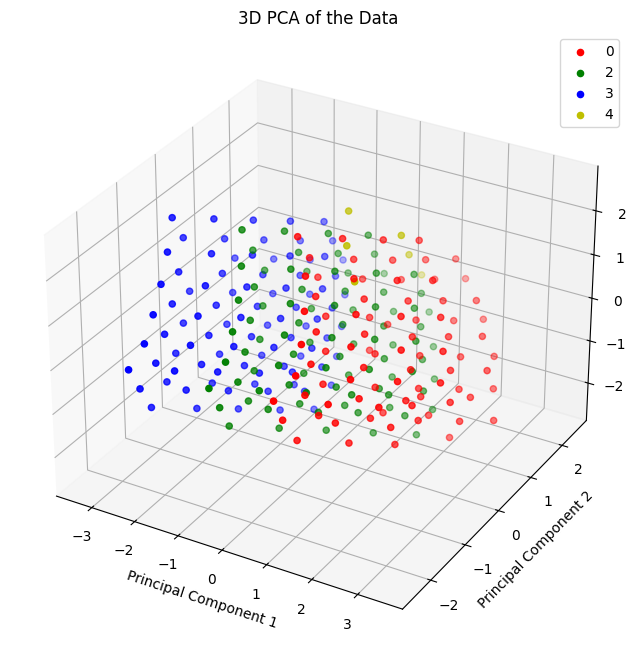

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# Load the data
try:
    df = pd.read_csv('./pi0_boxcox_5_filtered.csv')
except FileNotFoundError:
    print("File not found")

# Apply the Yeo-Johnson transformation
scaler = PowerTransformer(method='boxcox')
features = ['sdram_freq', 'cpu_cores', 'cpu_freq', 'avg_fps', 'total_time', 'mem_limit_kb']
x = df.loc[:, features]
x = scaler.fit_transform(x)

# Apply PCA for 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Concatenating DataFrame along axis=1. finalDf is the final DataFrame before plotting the data
finalDf = pd.concat([principalDf, df[['label']]], axis=1)

# Visualize the data
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of the Data')

labels = list(finalDf['label'].unique())
colors = ['r', 'g', 'b', 'y']
for label, color in zip(labels, colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c=color)

ax.legend(labels)

# Save the plot
plt.savefig('./3D_PCA_plot.png')

plt.show()
